In [27]:
# !pip install tensorflow --user
# !pip install keras
# !pip install daytime
# !pip install torch

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [30]:
dataset = pd.read_csv(r"/content/creditcard.csv")

In [31]:
# !gdown 1uBrrEjGh4fis8t1-EuEAJbFAxphw1Wb_

In [32]:
#dataset.head
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,352150.000000,352150.000000,352150.000000,352150.000000,352150.000000,352149.000000,352149.000000,352149.000000,352149.000000,352149.000000,...,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000,352148.000000
mean,85520.133716,-0.051701,-0.023523,0.126187,0.024737,-0.059546,0.018081,-0.019074,0.012130,-0.042245,...,-0.004611,-0.017987,-0.007030,0.001794,0.025918,0.004747,-0.000618,0.000109,91.861372,0.001738
std,46946.317531,1.945523,1.660947,1.485810,1.400123,1.380397,1.325555,1.230841,1.191254,1.084729,...,0.727560,0.710009,0.629894,0.603799,0.509874,0.483184,0.400988,0.333738,256.749373,0.041652
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,46235.000000,-0.945495,-0.615765,-0.665157,-0.832172,-0.746347,-0.744554,-0.564377,-0.193983,-0.675638,...,-0.224995,-0.536681,-0.165675,-0.347557,-0.288269,-0.325983,-0.069622,-0.048821,6.000000,0.000000
50%,71043.000000,-0.013775,0.057472,0.312042,0.017597,-0.114398,-0.249480,0.017376,0.035219,-0.085271,...,-0.032131,-0.011282,-0.019441,0.045744,0.056569,-0.058292,0.003279,0.014954,23.890000,0.000000
75%,131684.750000,1.254153,0.780542,1.111712,0.802010,0.545193,0.417907,0.541835,0.336833,0.549519,...,0.176499,0.485422,0.134822,0.430022,0.366745,0.248946,0.088423,0.077730,80.140000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [33]:
#check for any  nullvalues
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  True
-------
No. of unique labels  3
Label values  [ 0.  1. nan]
-------
Break down of the Normal and Fraud Transactions
0.0    351536
1.0       612
Name: Class, dtype: int64


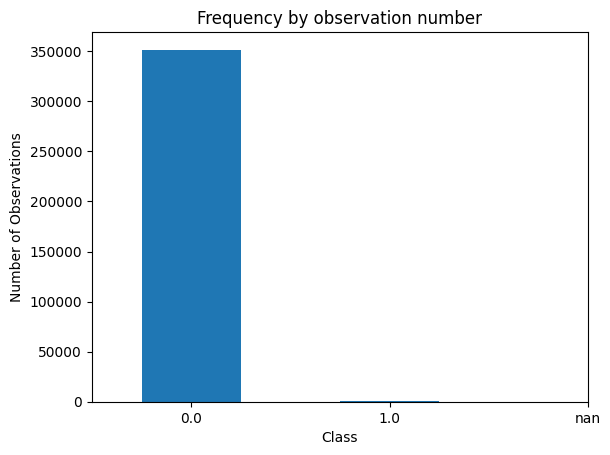

In [34]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

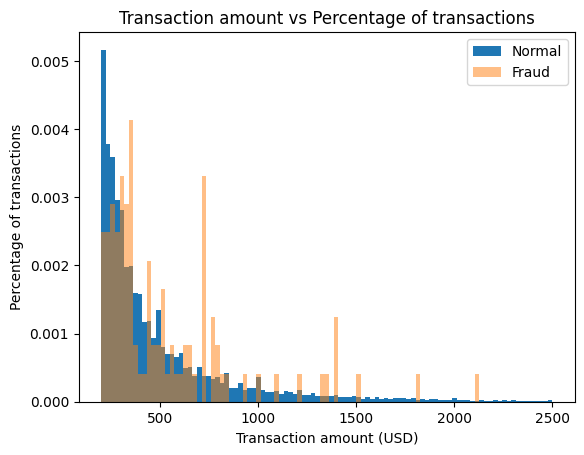

In [35]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [36]:
'''Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns.
Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. \nNormalizing the values between 0 and 1 did not work great for the dataset.'

In [37]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [38]:
'''The last column in the dataset is our target variable.'''

raw_data = dataset.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)

In [39]:
'''Normalize the data to have a value between 0 and 1'''

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [40]:
'''Use only normal transactions to train the Autoencoder.

Normal data has a value of 0 in the target variable. Using the target variable to create a normal and fraud dataset.'''

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 488
 No. of records in Normal Train data= 281232
 No. of records in Fraud Test Data= 126
 No. of records in Normal Test data= 70304


In [41]:
nb_epoch = 10
batch_size = 64
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4
learning_rate = 1e-7

In [42]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_6 (Dense)             (None, 14)                434       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
 dense_9 (Dense)             (None, 7)                 35        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0   

In [43]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

In [44]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [20]:
#Train the Autoencoder

history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3920/3925 [============================>.] - ETA: 0s - loss: nan - accuracy: 1.0000
Epoch 1: val_loss did not improve from inf
3925/3925 [==============================] - 12s 3ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/50
3915/3925 [============================>.] - ETA: 0s - loss: nan - accuracy: 1.0000
Epoch 2: val_loss did not improve from inf
3925/3925 [==============================] - 11s 3ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/50
3923/3925 [============================>.] - ETA: 0s - loss: nan - accuracy: 1.0000
Epoch 3: val_loss did not improve from inf
3925/3925 [==============================] - 11s 3ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/50
3925/3925 [==============================] - ETA: 0s - loss: nan - accuracy: 1.0000
Epoch 4: val_loss did not improve from inf
3925/3925 [==============================] - 10s 3ms/step - loss

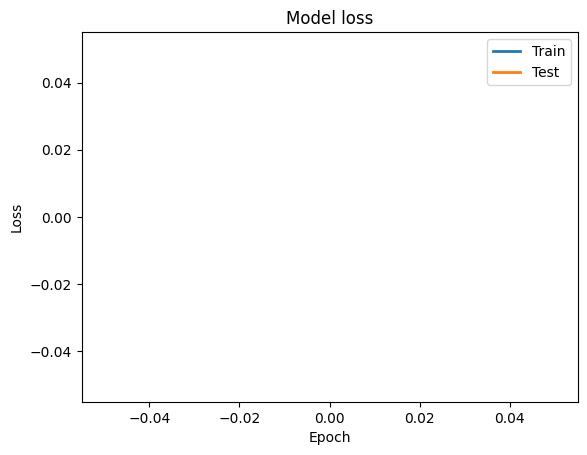

In [21]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [22]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data,
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

1966/1966 [==============================] - 3s 1ms/step


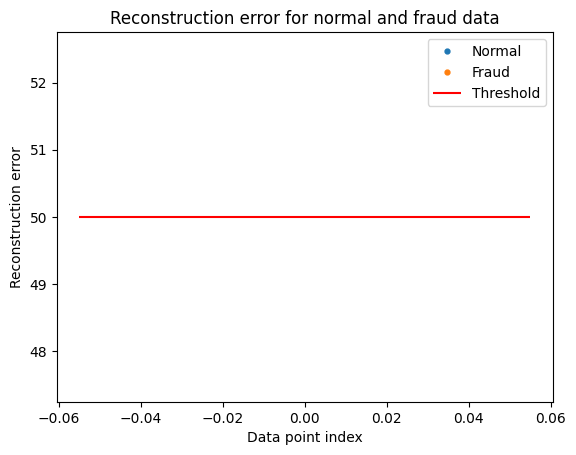

In [23]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

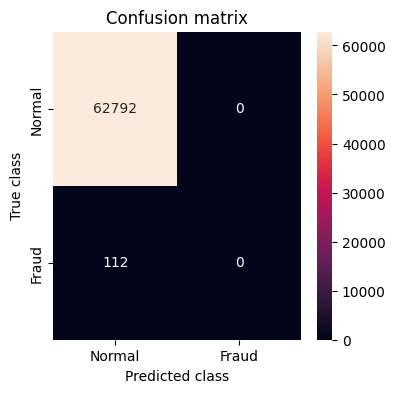

 Accuracy:  0.9982195090932214
 Recall:  0.0
 Precision:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold.
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''

threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

In [25]:
'''As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

Things to further improve precision and recall would add more relevant features,
different architecture for autoencoder, different hyperparameters, or a different algorithm.'''

'As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.\n\nThings to further improve precision and recall would add more relevant features, \ndifferent architecture for autoencoder, different hyperparameters, or a different algorithm.'

In [26]:
history

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}